In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor


# Air Quality Index

In [101]:
file = 'C:/Users/ASUS/OneDrive/Desktop/BENNETT UNIVERSITY/Semester 5/Competitive Programming/Project/CompProg/data.csv'
df = pd.read_csv(file, encoding = 'cp1252')
df

<ipython-input-101-b3d4a52975cc>:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, encoding = 'cp1252')


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
first_column = df.pop('date')
df.insert(0, 'date', first_column)
df

,date,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5
0,1990-02-01,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN
1,1990-02-01,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN
2,1990-02-01,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN
3,1990-03-01,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN
4,1990-03-01,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435737,2015-12-24,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN
435738,2015-12-29,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN
435739,NaN,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
a = df.drop(['stn_code', 'sampling_date', 'agency', 'location_monitoring_station'], axis = 1)
a

,date,state,location,type,so2,no2,rspm,spm,pm2_5
0,1990-02-01,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN
1,1990-02-01,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN
2,1990-02-01,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN
3,1990-03-01,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN
4,1990-03-01,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
435737,2015-12-24,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,NaN,NaN
435738,2015-12-29,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,NaN,NaN
435739,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
df2 = a[a['type'] == 'Industrial Area']
df3 = df2.drop(['type', 'pm2_5', 'spm'], axis = 1)
df3

,date,state,location,so2,no2,rspm
1,1990-02-01,Andhra Pradesh,Hyderabad,3.1,7.0,NaN
4,1990-03-01,Andhra Pradesh,Hyderabad,4.7,7.5,NaN
7,1990-04-01,Andhra Pradesh,Hyderabad,4.7,8.7,NaN
9,1990-05-01,Andhra Pradesh,Hyderabad,4.0,8.9,NaN
12,1990-06-01,Andhra Pradesh,Hyderabad,5.6,11.8,NaN
...,...,...,...,...,...,...
434903,2015-12-18,West Bengal,Raniganj,8.0,58.0,159.0
434904,2015-12-21,West Bengal,Raniganj,8.0,60.0,136.0
434905,2015-12-24,West Bengal,Raniganj,8.0,60.0,140.0
434906,2015-12-27,West Bengal,Raniganj,8.0,71.0,169.0


In [105]:
df3.rename(columns = {'date' : 'Date', 'state' : 'State', 'location' : 'Steel Industry Location', 'so2' : 'SO2', 'no2' : 'NO2', 'rspm' : 'RSPM'}, inplace = True)
df3


,Date,State,Steel Industry Location,SO2,NO2,RSPM
1,1990-02-01,Andhra Pradesh,Hyderabad,3.1,7.0,NaN
4,1990-03-01,Andhra Pradesh,Hyderabad,4.7,7.5,NaN
7,1990-04-01,Andhra Pradesh,Hyderabad,4.7,8.7,NaN
9,1990-05-01,Andhra Pradesh,Hyderabad,4.0,8.9,NaN
12,1990-06-01,Andhra Pradesh,Hyderabad,5.6,11.8,NaN
...,...,...,...,...,...,...
434903,2015-12-18,West Bengal,Raniganj,8.0,58.0,159.0
434904,2015-12-21,West Bengal,Raniganj,8.0,60.0,136.0
434905,2015-12-24,West Bengal,Raniganj,8.0,60.0,140.0
434906,2015-12-27,West Bengal,Raniganj,8.0,71.0,169.0


In [106]:
max_v = df3['RSPM'].max()
min_v = max_v

for i in df3['RSPM']:
    if pd.notnull(i):
        min_v = min(max_v, i)

print("Max:", max_v, "Min:", min_v)


Max: 1288.0 Min: 248.0


In [107]:
max_v = df3['SO2'].max()
min_v = max_v

for i in df3['SO2']:
    if pd.notnull(i):
        min_v = min(max_v, i)

print("Max:", max_v, "Min:", min_v)


Max: 909.0 Min: 12.0


In [108]:
max_v = df3['NO2'].max()
min_v = max_v

for i in df3['NO2']:
    if pd.notnull(i):
        min_v = min(max_v, i)

print("Max:", max_v, "Min:", min_v)


Max: 592.0 Min: 72.0


In [109]:
random_values = np.random.randint(min_v, max_v + 1, size=len(df3))
df3['RSPM'].fillna(pd.Series(random_values, index=df3.index), inplace=True)
df3.reset_index(inplace=True, drop=True)
df3

,Date,State,Steel Industry Location,SO2,NO2,RSPM
0,1990-02-01,Andhra Pradesh,Hyderabad,3.1,7.0,296.0
1,1990-03-01,Andhra Pradesh,Hyderabad,4.7,7.5,422.0
2,1990-04-01,Andhra Pradesh,Hyderabad,4.7,8.7,457.0
3,1990-05-01,Andhra Pradesh,Hyderabad,4.0,8.9,344.0
4,1990-06-01,Andhra Pradesh,Hyderabad,5.6,11.8,316.0
...,...,...,...,...,...,...
96086,2015-12-18,West Bengal,Raniganj,8.0,58.0,159.0
96087,2015-12-21,West Bengal,Raniganj,8.0,60.0,136.0
96088,2015-12-24,West Bengal,Raniganj,8.0,60.0,140.0
96089,2015-12-27,West Bengal,Raniganj,8.0,71.0,169.0


In [110]:
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

df3['SO2_SubIndex'] = df3['SO2'].apply(lambda x: get_SO2_subindex(x))
df3

,Date,State,Steel Industry Location,SO2,NO2,RSPM,SO2_SubIndex
0,1990-02-01,Andhra Pradesh,Hyderabad,3.1,7.0,296.0,3.875
1,1990-03-01,Andhra Pradesh,Hyderabad,4.7,7.5,422.0,5.875
2,1990-04-01,Andhra Pradesh,Hyderabad,4.7,8.7,457.0,5.875
3,1990-05-01,Andhra Pradesh,Hyderabad,4.0,8.9,344.0,5.000
4,1990-06-01,Andhra Pradesh,Hyderabad,5.6,11.8,316.0,7.000
...,...,...,...,...,...,...,...
96086,2015-12-18,West Bengal,Raniganj,8.0,58.0,159.0,10.000
96087,2015-12-21,West Bengal,Raniganj,8.0,60.0,136.0,10.000
96088,2015-12-24,West Bengal,Raniganj,8.0,60.0,140.0,10.000
96089,2015-12-27,West Bengal,Raniganj,8.0,71.0,169.0,10.000


In [111]:
def get_NO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

df3["NO2_SubIndex"] = df3["NO2"].apply(lambda x: get_NO2_subindex(x))
df3

,Date,State,Steel Industry Location,SO2,NO2,RSPM,SO2_SubIndex,NO2_SubIndex
0,1990-02-01,Andhra Pradesh,Hyderabad,3.1,7.0,296.0,3.875,8.750
1,1990-03-01,Andhra Pradesh,Hyderabad,4.7,7.5,422.0,5.875,9.375
2,1990-04-01,Andhra Pradesh,Hyderabad,4.7,8.7,457.0,5.875,10.875
3,1990-05-01,Andhra Pradesh,Hyderabad,4.0,8.9,344.0,5.000,11.125
4,1990-06-01,Andhra Pradesh,Hyderabad,5.6,11.8,316.0,7.000,14.750
...,...,...,...,...,...,...,...,...
96086,2015-12-18,West Bengal,Raniganj,8.0,58.0,159.0,10.000,72.500
96087,2015-12-21,West Bengal,Raniganj,8.0,60.0,136.0,10.000,75.000
96088,2015-12-24,West Bengal,Raniganj,8.0,60.0,140.0,10.000,75.000
96089,2015-12-27,West Bengal,Raniganj,8.0,71.0,169.0,10.000,88.750


In [112]:
def get_RSPM_subindex(x):
    if x <= 100:
        return x * 50 / 100
    elif x < 250:
        return 50 + (x - 100) * 50 / 100
    elif x <= 450:
        return 100 + (x - 250) * 100 / 150
    elif x <= 600:
        return 200 + (x - 450) * 100 / 200
    elif x <= 850:
        return 400 + (x - 600) * 100 / 300
    elif x > 850:
        return 400 + (x - 850) * 100 / 300
    else:
        return 0

df3["RSPM_SubIndex"] = df3["RSPM"].apply(lambda x: get_RSPM_subindex(x))
df3

,Date,State,Steel Industry Location,SO2,NO2,RSPM,SO2_SubIndex,NO2_SubIndex,RSPM_SubIndex
0,1990-02-01,Andhra Pradesh,Hyderabad,3.1,7.0,296.0,3.875,8.750,130.666667
1,1990-03-01,Andhra Pradesh,Hyderabad,4.7,7.5,422.0,5.875,9.375,214.666667
2,1990-04-01,Andhra Pradesh,Hyderabad,4.7,8.7,457.0,5.875,10.875,203.500000
3,1990-05-01,Andhra Pradesh,Hyderabad,4.0,8.9,344.0,5.000,11.125,162.666667
4,1990-06-01,Andhra Pradesh,Hyderabad,5.6,11.8,316.0,7.000,14.750,144.000000
...,...,...,...,...,...,...,...,...,...
96086,2015-12-18,West Bengal,Raniganj,8.0,58.0,159.0,10.000,72.500,79.500000
96087,2015-12-21,West Bengal,Raniganj,8.0,60.0,136.0,10.000,75.000,68.000000
96088,2015-12-24,West Bengal,Raniganj,8.0,60.0,140.0,10.000,75.000,70.000000
96089,2015-12-27,West Bengal,Raniganj,8.0,71.0,169.0,10.000,88.750,84.500000


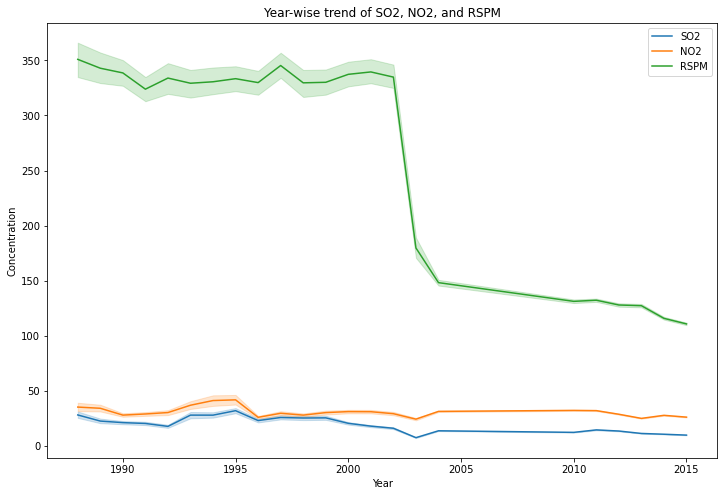

In [113]:
df3['Date'] = pd.to_datetime(df3['Date'])
df3['Year'] = df3['Date'].dt.year

plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='SO2', data=df3, label='SO2')
sns.lineplot(x='Year', y='NO2', data=df3, label='NO2')
sns.lineplot(x='Year', y='RSPM', data=df3, label='RSPM')
plt.title('Year-wise trend of SO2, NO2, and RSPM')
plt.xlabel('Year')
plt.ylabel('Concentration')
plt.legend()
plt.show()


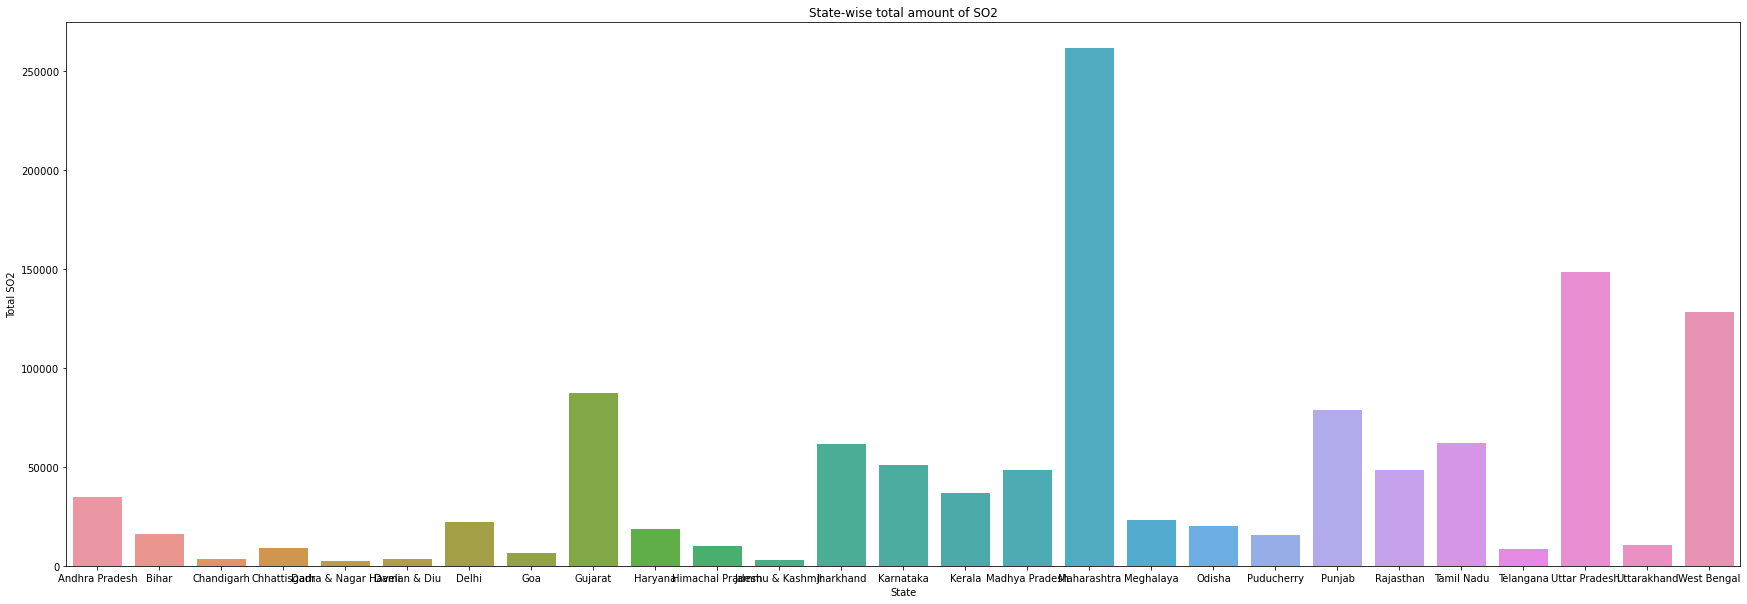

In [114]:
plt.figure(figsize=(30, 10))
sns.barplot(x='State', y='SO2', data=df3, estimator=sum, ci=None)
plt.title('State-wise total amount of SO2')
plt.xlabel('State')
plt.ylabel('Total SO2')
plt.show()

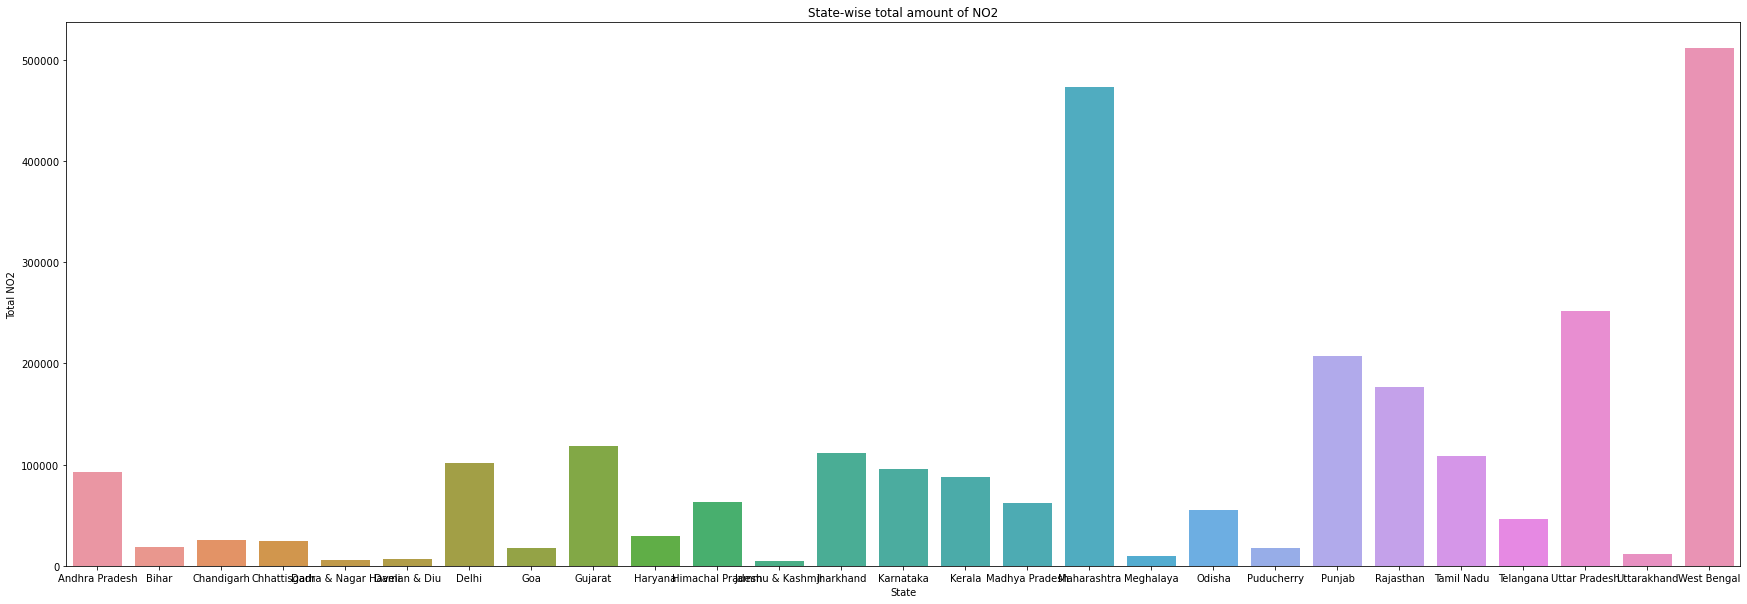

In [115]:
plt.figure(figsize=(30, 10))
sns.barplot(x='State', y='NO2', data=df3, estimator=sum, ci=None)
plt.title('State-wise total amount of NO2')
plt.xlabel('State')
plt.ylabel('Total NO2')
plt.show()

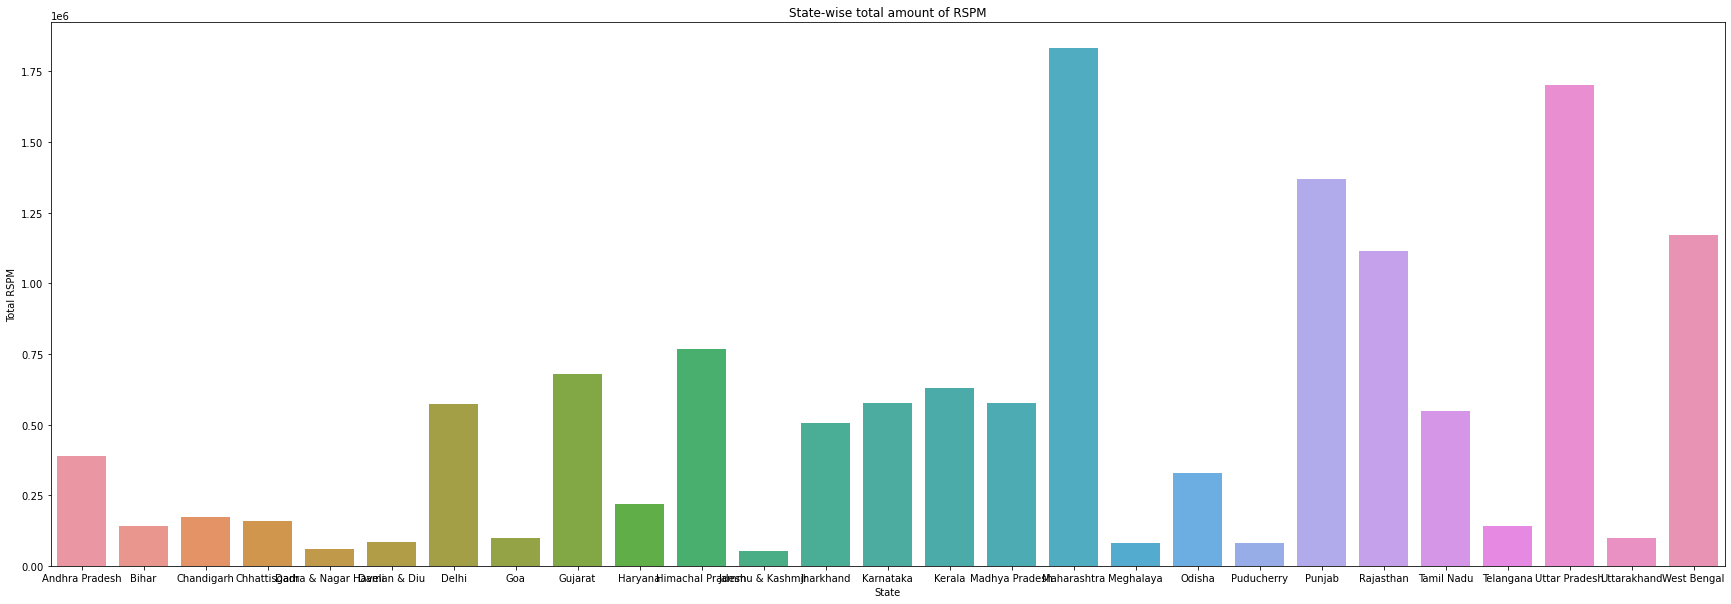

In [116]:
plt.figure(figsize=(30, 10))
sns.barplot(x='State', y='RSPM', data=df3, estimator=sum, ci=None)
plt.title('State-wise total amount of RSPM')
plt.xlabel('State')
plt.ylabel('Total RSPM')
plt.show()

In [117]:
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN

In [118]:
df3["Checks"] = (df3["SO2_SubIndex"] > 0).astype(int) + \
                (df3["NO2_SubIndex"] > 0).astype(int) + \
                (df3["RSPM_SubIndex"] > 0).astype(int)

df3["AQI_calculated"] = round(df3[["SO2_SubIndex", "NO2_SubIndex",
                                 "RSPM_SubIndex"]].max(axis=1))

df3["AQI_bucket"] = df3["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))
df3

,Date,State,Steel Industry Location,SO2,NO2,RSPM,SO2_SubIndex,NO2_SubIndex,RSPM_SubIndex,Year,Checks,AQI_calculated,AQI_bucket
0,1990-02-01,Andhra Pradesh,Hyderabad,3.1,7.0,296.0,3.875,8.750,130.666667,1990.0,3,131.0,Moderate
1,1990-03-01,Andhra Pradesh,Hyderabad,4.7,7.5,422.0,5.875,9.375,214.666667,1990.0,3,215.0,Poor
2,1990-04-01,Andhra Pradesh,Hyderabad,4.7,8.7,457.0,5.875,10.875,203.500000,1990.0,3,204.0,Poor
3,1990-05-01,Andhra Pradesh,Hyderabad,4.0,8.9,344.0,5.000,11.125,162.666667,1990.0,3,163.0,Moderate
4,1990-06-01,Andhra Pradesh,Hyderabad,5.6,11.8,316.0,7.000,14.750,144.000000,1990.0,3,144.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96086,2015-12-18,West Bengal,Raniganj,8.0,58.0,159.0,10.000,72.500,79.500000,2015.0,3,80.0,Satisfactory
96087,2015-12-21,West Bengal,Raniganj,8.0,60.0,136.0,10.000,75.000,68.000000,2015.0,3,75.0,Satisfactory
96088,2015-12-24,West Bengal,Raniganj,8.0,60.0,140.0,10.000,75.000,70.000000,2015.0,3,75.0,Satisfactory
96089,2015-12-27,West Bengal,Raniganj,8.0,71.0,169.0,10.000,88.750,84.500000,2015.0,3,89.0,Satisfactory


<Figure size 1008x576 with 0 Axes>

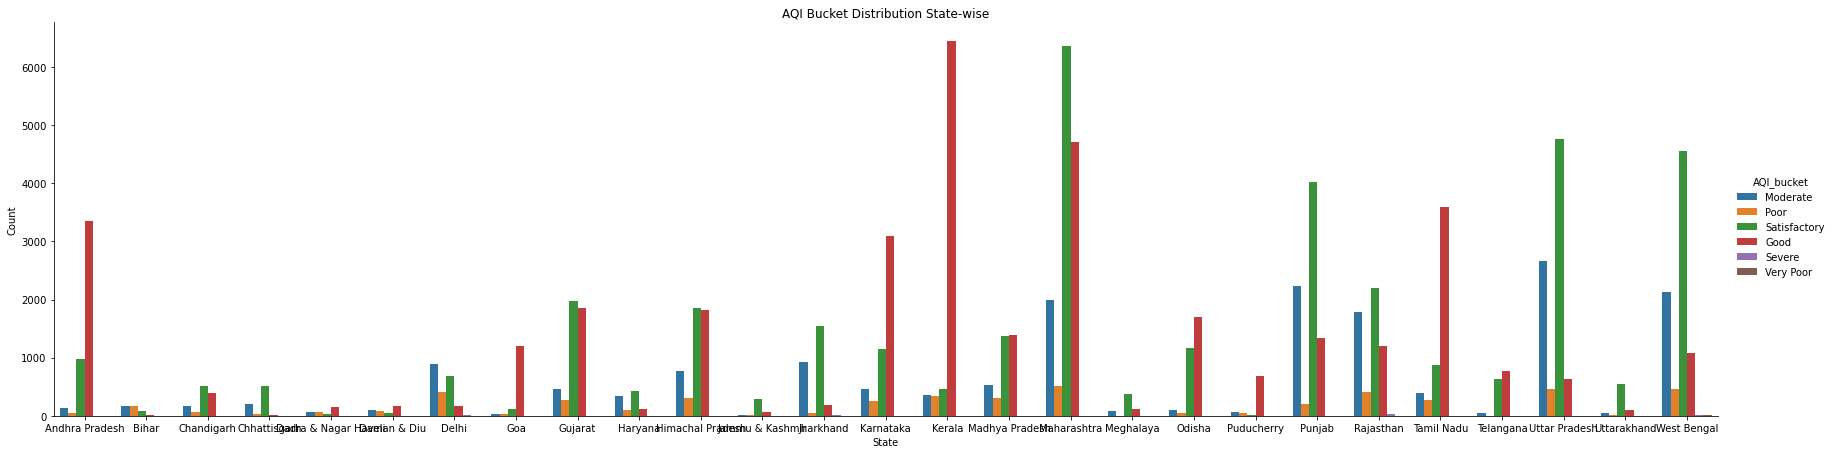

In [122]:
df3['Date'] = pd.to_datetime(df3['Date'])
plt.figure(figsize=(14, 8))

sns.catplot(x='State', hue='AQI_bucket', data=df3, kind='count', height=6, aspect=4)
plt.title('AQI Bucket Distribution State-wise')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()


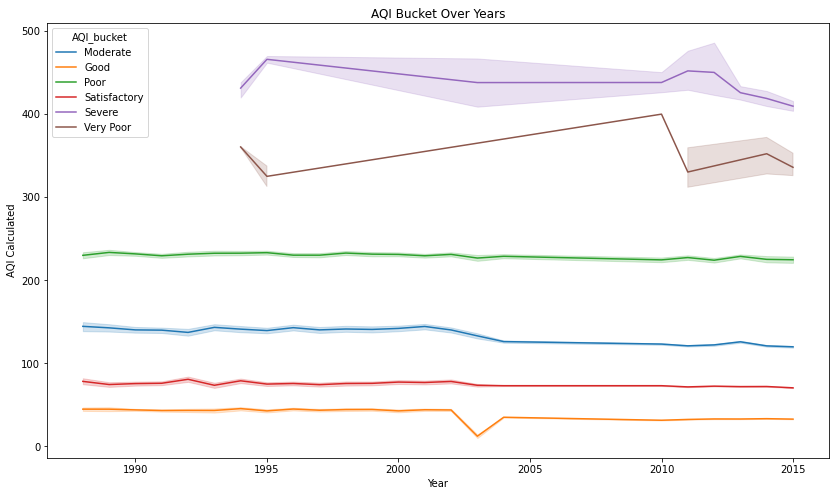

In [28]:
df3['Date'] = pd.to_datetime(df3['Date'])
df3['Year'] = df3['Date'].dt.year

plt.figure(figsize=(14, 8))

# Plotting year-wise AQI bucket
sns.lineplot(x='Year', y='AQI_calculated', hue='AQI_bucket', data=df3)
plt.title('AQI Bucket Over Years')
plt.xlabel('Year')
plt.ylabel('AQI Calculated')
plt.show()

In [57]:
X = df3[['SO2_SubIndex', 'NO2_SubIndex', 'RSPM_SubIndex']]
y = df3['AQI_calculated']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                256       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2369 (9.25 KB)
Trainable params: 2369 (9.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [59]:
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [60]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [61]:
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/50
1922/1922 [==============================] - 2s 823us/step - loss: 745.3725 - accuracy: 1.6261e-05 - val_loss: 7.5845 - val_accuracy: 0.0000e+00
Epoch 2/50
1922/1922 [==============================] - 2s 786us/step - loss: 5.0183 - accuracy: 0.0000e+00 - val_loss: 3.0717 - val_accuracy: 0.0000e+00
Epoch 3/50
1922/1922 [==============================] - 2s 788us/step - loss: 2.3123 - accuracy: 6.5044e-05 - val_loss: 1.6191 - val_accuracy: 0.0000e+00
Epoch 4/50
1922/1922 [==============================] - 2s 783us/step - loss: 1.3356 - accuracy: 4.3905e-04 - val_loss: 1.0061 - val_accuracy: 0.0025
Epoch 5/50
1922/1922 [==============================] - 1s 777us/step - loss: 0.7619 - accuracy: 0.0012 - val_loss: 0.5472 - val_accuracy: 0.0025
Epoch 6/50
1922/1922 [==============================] - 2s 780us/step - loss: 0.5308 - accuracy: 0.0017 - val_loss: 0.4594 - val_accuracy: 0.0025
Epoch 7/50
1922/1922 [==============================] - 1s 771us/step - loss: 0.4042 - accurac

In [62]:
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'ANN Mean Squared Error: {mse}')

601/601 [==============================] - 0s 494us/step
ANN Mean Squared Error: 0.14939877136238888


In [63]:
# Decision Tree Regressor
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train_scaled, y_train)
y_pred_dt = model_dt.predict(X_test_scaled)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f'Decision Tree Mean Squared Error: {mse_dt}')


Decision Tree Mean Squared Error: 2.773713512669754


In [64]:
# Random Forest Regressor
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train_scaled, y_train)
y_pred_rf = model_rf.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Random Forest Mean Squared Error: {mse_rf}')


Random Forest Mean Squared Error: 2.4877264529892296


In [65]:
model_ridge = Ridge()
model_ridge.fit(X_train_scaled, y_train)
y_pred_ridge = model_ridge.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Ridge Regression Mean Squared Error: {mse_ridge}')


Ridge Regression Mean Squared Error: 114.10302912848853


In [66]:
model_lasso = Lasso()
model_lasso.fit(X_train_scaled, y_train)
y_pred_lasso = model_lasso.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Lasso Regression Mean Squared Error: {mse_lasso}')


Lasso Regression Mean Squared Error: 115.7705680259207


In [67]:
model_gb = GradientBoostingRegressor()
model_gb.fit(X_train_scaled, y_train)
y_pred_gb = model_gb.predict(X_test_scaled)
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f'Gradient Boosting Regressor Mean Squared Error: {mse_gb}')

Gradient Boosting Regressor Mean Squared Error: 3.5907485784999693


In [70]:
y_pred_dt = model_dt.predict(X_test_scaled)
y_pred_rf = model_rf.predict(X_test_scaled)
y_pred_ridge = model_ridge.predict(X_test_scaled)
y_pred_lasso = model_lasso.predict(X_test_scaled)
y_pred_gb = model_gb.predict(X_test_scaled)
y_pred_ann = model.predict(X_test_scaled).flatten()

predictions_df = pd.DataFrame({'Actual': y_test})
predictions_df['DecisionTree'] = y_pred_dt
predictions_df['RandomForest'] = y_pred_rf
predictions_df['RidgeRegression'] = y_pred_ridge
predictions_df['LassoRegression'] = y_pred_lasso
predictions_df['GradientBoosting'] = y_pred_gb
predictions_df['ANN'] = y_pred_ann


predictions_df


601/601 [==============================] - 0s 467us/step


,Actual,DecisionTree,RandomForest,RidgeRegression,LassoRegression,GradientBoosting,ANN
36909,28.0,28.0,28.0,32.074116,33.372047,30.464053,28.108227
29005,42.0,42.0,42.0,46.211700,47.246104,43.833911,42.451988
72669,206.0,206.0,206.0,190.545017,189.546856,205.520262,205.936279
26894,18.0,18.0,18.0,16.769469,18.640288,19.260805,18.588997
25782,20.0,20.0,20.0,18.457722,20.165199,20.352919,19.975105
...,...,...,...,...,...,...,...
5772,101.0,101.0,101.0,111.054887,110.457548,99.582114,101.007172
47987,48.0,48.0,48.0,49.422745,50.221299,48.226535,48.470856
31341,27.0,27.0,27.0,24.495624,26.292732,28.208337,27.063114
14872,41.0,41.0,41.0,42.162867,43.093892,41.153120,40.975468


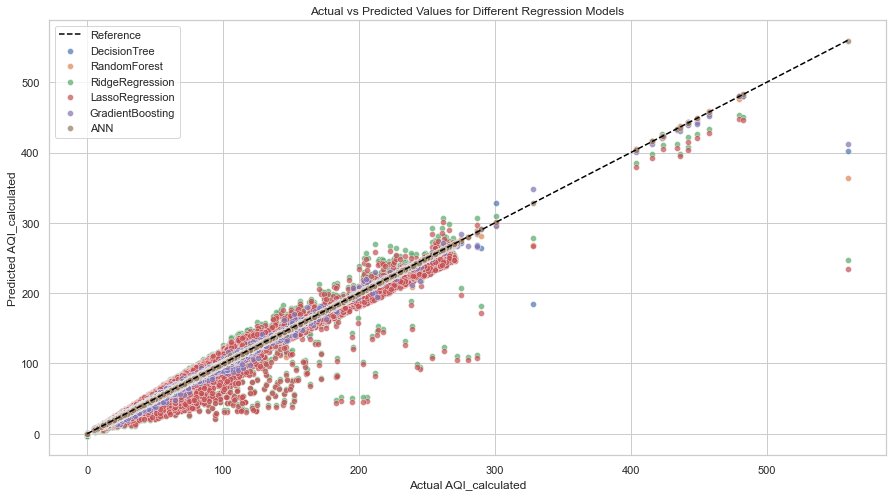

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot for each model
plt.figure(figsize=(15, 8))
models = ['DecisionTree', 'RandomForest', 'RidgeRegression', 'LassoRegression', 'GradientBoosting', 'ANN']

for model in models:
    sns.scatterplot(x='Actual', y=model, data=predictions_df, label=model, alpha=0.7)

# Add a diagonal line for reference
plt.plot([predictions_df['Actual'].min(), predictions_df['Actual'].max()],
         [predictions_df['Actual'].min(), predictions_df['Actual'].max()],
         linestyle='--', color='black', label='Reference')

plt.title('Actual vs Predicted Values for Different Regression Models')
plt.xlabel('Actual AQI_calculated')
plt.ylabel('Predicted AQI_calculated')
plt.legend()
plt.show()


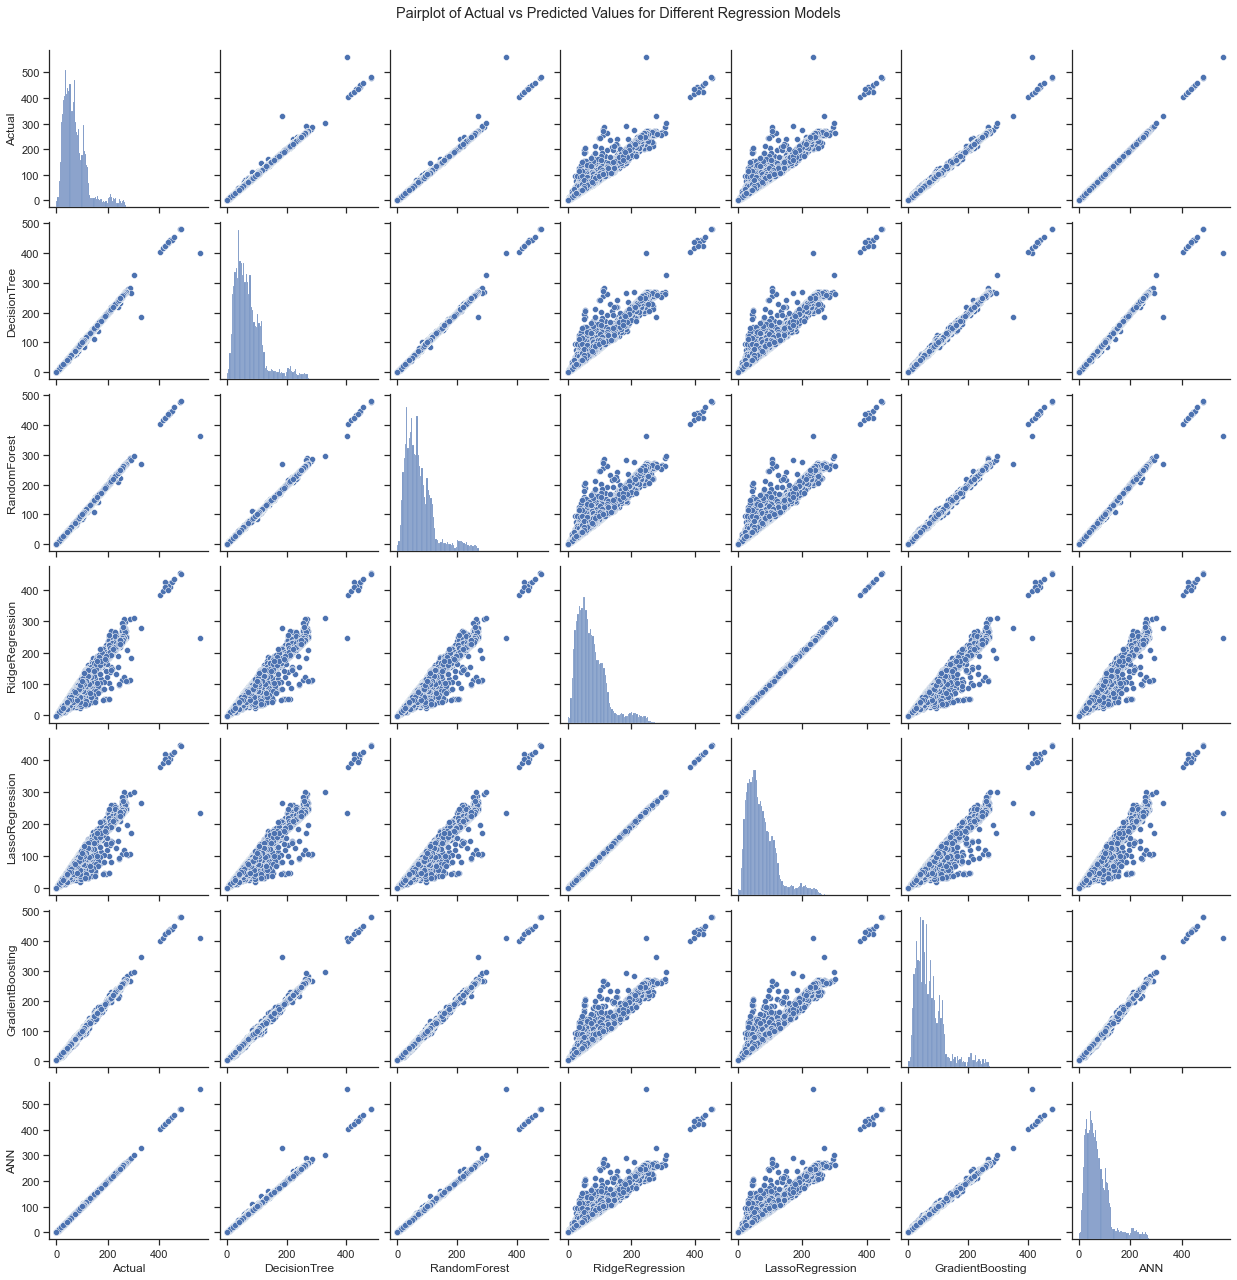

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

pairplot_df = pd.concat([predictions_df['Actual'], predictions_df[models]], axis=1)

sns.set(style="ticks")

sns.pairplot(pairplot_df, height=2.5)
plt.suptitle('Pairplot of Actual vs Predicted Values for Different Regression Models', y=1.02)
plt.show()
